In [1]:
#
url="https://raw.githubusercontent.com/sameerCoder/ML_Datasets/main/insurance.csv"
import pandas as pd
dfdt=pd.read_csv(url)

In [2]:
print(dfdt.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
# As IN Decision Tree we can do both Regression and classification.
# so now case1 considering DecisionTreeRegressor.
# Taking independent variable bmi 
# Dependent variable charges.

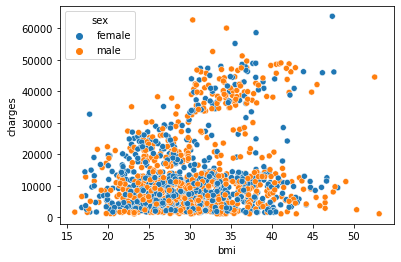

In [15]:
import  matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=dfdt['bmi'],y=dfdt['charges'],hue=dfdt['sex'])
print()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dfdt[['bmi']],dfdt[['charges']],test_size=0.3)

#x_train,x_test,y_train,y_test=train_test_split(dfdt[['bmi']],dfdt[['charges']],train_size=0.7)

In [6]:
from sklearn.tree import DecisionTreeRegressor as dtr
modeldtr= dtr()
modeldtr.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [8]:
y_predict=modeldtr.predict(x_test)
print(y_predict[:5])

[12629.1656  13224.05705  6311.952   34672.1472  16631.57695]


In [9]:
y_test.head()

,charges
5,3756.62160
484,9563.02900
704,8930.93455
57,34303.16720
1052,9288.02670


In [12]:
from sklearn.metrics import mean_squared_error as mse
accuracy=mse(y_test,y_predict)
accuracy

258870766.20545194

In [ ]:
################################################################

In [ ]:
##########################################################


In [16]:
# DecisionTreeClassification.
#objective- To findout whether the passanger survived or not based on pclass, sex age fare 

In [17]:
dftitanic=pd.read_csv("https://raw.githubusercontent.com/sameerCoder/ML_Datasets/main/titanic.csv")
dftitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
# As we know that classification will work only on Bool type value , 
#so here we need to change the sex to label data.
#dependent variable= Survived
#independent variables= Pclass, Sex, Fare
from sklearn.preprocessing import LabelEncoder
labelobj1=LabelEncoder()
dftitanic_sexn=labelobj1.fit_transform(dftitanic[['Sex']])
print(dftitanic_sexn[:5])
dftitanic[['Sex_n']]=dftitanic_sexn
print(type(dftitanic[['Sex']]))
print(type(dftitanic[['Sex_n']]))

[1 0 0 0 1]
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
print(dftitanic[['Sex']].head()); print(dftitanic[['Sex_n']].head())

      Sex
0    male
1  female
2  female
3  female
4    male
   Sex_n
0      1
1      0
2      0
3      0
4      1


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dftitanic[['Pclass', 'Sex_n', 'Fare']],dftitanic[['Survived']],test_size=0.3)


In [32]:
from sklearn.tree import DecisionTreeClassifier as dtc
dtc1=dtc()
dtc1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
y_predict=dtc1.predict(x_test)
print(y_predict[:5])

[0 0 0 0 1]


In [35]:
print(y_test.head())

     Survived
365         0
474         0
55          1
794         0
28          1


In [38]:
from sklearn.metrics import confusion_matrix as cm
mat=cm(y_test,y_predict)
print(mat)
print(dftitanic.shape)

[[148  22]
 [ 31  67]]
(891, 13)


In [50]:
# left diagonal is Right and Right diagonal is wrong.
print("Correct:",148+67)
print(148+67+22+31)
print(0.3*891)


Correct: 215
268
267.3
